In [1]:
import matplotlib.pyplot as plt
from scipy.special import expit
from pylab import *
from itertools import product
city =   0
drone =  1
rice = 2
couscous = 3
beer = 4
name_map = {city: 'city phone', drone: 'drone phone', rice: 'rice', couscous: 'couscous', beer: 'beer'}

# An embedding provided that gives similarities between products
Psi = array([[1.,0,0],[1,0,0],[0,1,0],[0,1,0],[0,0,1]])
P, K = Psi.shape

Psi

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [2]:
matmul(Psi,Psi.T)

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
P = 5 # number of products


data = [{'a': city, 'h': [city], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [city], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': couscous, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 1000, 'C': 20},        
        {'a': couscous, 'h': [couscous], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


# unlucky in the sense that we get 1/1 click when h=beer and a=city
data_unlucky = [{'a': city, 'h': [city], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [city], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': couscous, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 1000, 'C': 20},        
        {'a': couscous, 'h': [couscous], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 1, 'C': 1},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


data_empty = [{'a': city, 'h': [city], 'I': 0, 'C': 0},
        {'a': drone, 'h': [city], 'I': 0, 'C': 0},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 0, 'C': 0},
        {'a': drone, 'h': [drone], 'I': 0, 'C': 0},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [rice], 'I': 0, 'C': 0},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 0, 'C': 0}]

In [4]:
data

[{'a': 0, 'h': [0], 'I': 1000, 'C': 10},
 {'a': 1, 'h': [0], 'I': 1000, 'C': 20},
 {'a': 2, 'h': [0], 'I': 0, 'C': 0},
 {'a': 3, 'h': [0], 'I': 0, 'C': 0},
 {'a': 4, 'h': [0], 'I': 0, 'C': 0},
 {'a': 0, 'h': [1], 'I': 1000, 'C': 10},
 {'a': 1, 'h': [1], 'I': 1000, 'C': 10},
 {'a': 2, 'h': [1], 'I': 0, 'C': 0},
 {'a': 3, 'h': [1], 'I': 0, 'C': 0},
 {'a': 4, 'h': [1], 'I': 0, 'C': 0},
 {'a': 0, 'h': [2], 'I': 0, 'C': 0},
 {'a': 1, 'h': [2], 'I': 0, 'C': 0},
 {'a': 2, 'h': [2], 'I': 1000, 'C': 10},
 {'a': 3, 'h': [2], 'I': 1000, 'C': 20},
 {'a': 4, 'h': [2], 'I': 0, 'C': 0},
 {'a': 0, 'h': [3], 'I': 0, 'C': 0},
 {'a': 1, 'h': [3], 'I': 0, 'C': 0},
 {'a': 2, 'h': [3], 'I': 1000, 'C': 20},
 {'a': 3, 'h': [3], 'I': 1000, 'C': 10},
 {'a': 4, 'h': [3], 'I': 0, 'C': 0},
 {'a': 0, 'h': [4], 'I': 0, 'C': 0},
 {'a': 1, 'h': [4], 'I': 0, 'C': 0},
 {'a': 2, 'h': [4], 'I': 0, 'C': 0},
 {'a': 3, 'h': [4], 'I': 0, 'C': 0},
 {'a': 4, 'h': [4], 'I': 1000, 'C': 20}]

In [5]:
def expand_data_binomial(d):
    a = d['a']
    omega = vstack([Psi[h,:] for h in d['h']]).mean(0)
    c = d['C']
    i = d['I']
    return omega, a, c, i

In [6]:
def do_plot(s):
    med = s['ctr'].mean(0).flatten()
    low = med - percentile(s['ctr'],2.5,axis=0).flatten()
    up = percentile(s['ctr'],97.5,axis=0).flatten() - med


    xnames = ['h=' + h+' a='+a for h,a in product(name_map.values(),name_map.values())]
    figure(figsize=(10,8))

    errorbar(xnames,y=med.flatten(),yerr=vstack((low,up)),fmt='.',ecolor='rrrrrgggggmmmmmccccckkkkk')
    plot(xnames,med.flatten(),'go')
    _ = xticks(rotation=90)

    plot(xnames,(click)/(impres),'x')

    
def print_best_rec(s):
    best_rec = s['ctr'].mean(0).argmax(1)

    for ii in range(P):
        print('when hist is ' + list(name_map.values())[ii] + ' recommend ' + list(name_map.values())[best_rec[ii]])

In [7]:
import pystan


script = """
data {
  int P;
  int N;
  int K;
  int click[N];
  int impres[N];  
  int a[N];
  vector[K] omega[N];
  matrix[P,K] Psi;
  real w1;
  real w2;
}

parameters {
  matrix[K,K] eps;
  real offset;
  real rho[P];
} transformed parameters{
  matrix[P,K] beta;
  
  beta = w1 * Psi + w2 * Psi * eps;
}

model {
  rho ~ normal(0, 0.1);
  offset ~ normal(-8,2);
  for (k in 1:K) {
    eps[k] ~ normal(0, 1);
  }
  for (n in 1:N) {
    click[n] ~ binomial_logit(impres[n],  dot_product(omega[n], beta[a[n],:]) + offset + rho[a[n]]);
  }
} generated quantities {
  matrix[P,P] ctr;
  for (p in 1:P) {
     ctr = inv_logit(Psi * beta' + offset + rho[p]);
  }
}
"""

model = pystan.StanModel(model_code=script)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_db65b353cae582ef7639d53ee6044e5e NOW.


Let's try the model using only the organic embeddings and no bandit data

In [8]:
# fit to the empty data set
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data_empty])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

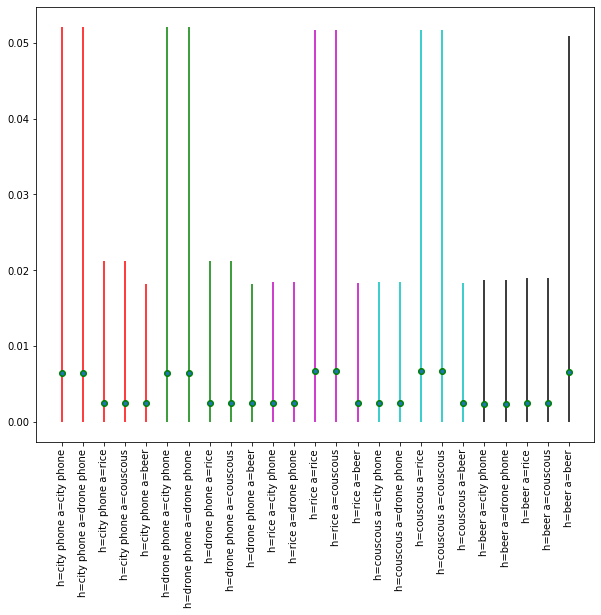

In [9]:
do_plot(s)

In [10]:
print_best_rec(s)

when hist is city phone recommend city phone
when hist is drone phone recommend city phone
when hist is rice recommend rice
when hist is couscous recommend rice
when hist is beer recommend beer


Now let's see if we get an advantage by using the bandit signal

In [11]:
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

In [12]:
omega

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [13]:
Psi

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
action

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])

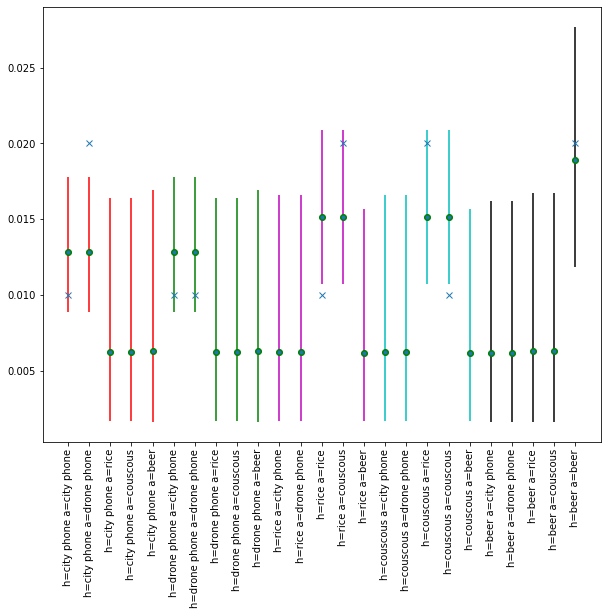

In [15]:
do_plot(s)

In [16]:
print_best_rec(s)

when hist is city phone recommend city phone
when hist is drone phone recommend city phone
when hist is rice recommend rice
when hist is couscous recommend rice
when hist is beer recommend beer


In [17]:
s['beta'].mean(0)

array([[ 8.83173064e-01, -3.56907066e-04, -6.31409778e-03],
       [ 8.83173064e-01, -3.56907066e-04, -6.31409778e-03],
       [ 2.62869307e-03,  1.05158706e+00,  5.90877454e-03],
       [ 2.62869307e-03,  1.05158706e+00,  5.90877454e-03],
       [ 3.72439178e-03,  2.74884649e-03,  1.26863151e+00]])

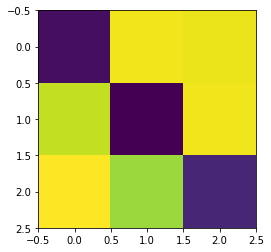

In [18]:
imshow(s['eps'].std(0))vbl;/"|
]{|P"O;aqz§1234="}"

In [19]:
s['eps'].mean(0)

array([[-0.23365387, -0.00071381, -0.0126282 ],
       [ 0.00525739,  0.10317412,  0.01181755],
       [ 0.00744878,  0.00549769,  0.53726302]])

In [20]:
percentile(s['ctr'],50,axis=0).flatten()



array([0.01263354, 0.01263354, 0.00528866, 0.00528866, 0.00527844,
       0.01263354, 0.01263354, 0.00528866, 0.00528866, 0.00527844,
       0.00521475, 0.00521475, 0.01494595, 0.01494595, 0.00531063,
       0.00521475, 0.00521475, 0.01494595, 0.01494595, 0.00531063,
       0.00519275, 0.00519275, 0.00527474, 0.00527474, 0.01860903])

In [21]:
s['ctr'].mean(0)

array([[0.0128291 , 0.0128291 , 0.00625974, 0.00625974, 0.00631724],
       [0.0128291 , 0.0128291 , 0.00625974, 0.00625974, 0.00631724],
       [0.0062728 , 0.0062728 , 0.01512443, 0.01512443, 0.00620906],
       [0.0062728 , 0.0062728 , 0.01512443, 0.01512443, 0.00620906],
       [0.00621706, 0.00621706, 0.00630606, 0.00630606, 0.01890342]])

In [22]:
# fit to the unlucky data set
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data_unlucky])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

(0, 0.04)

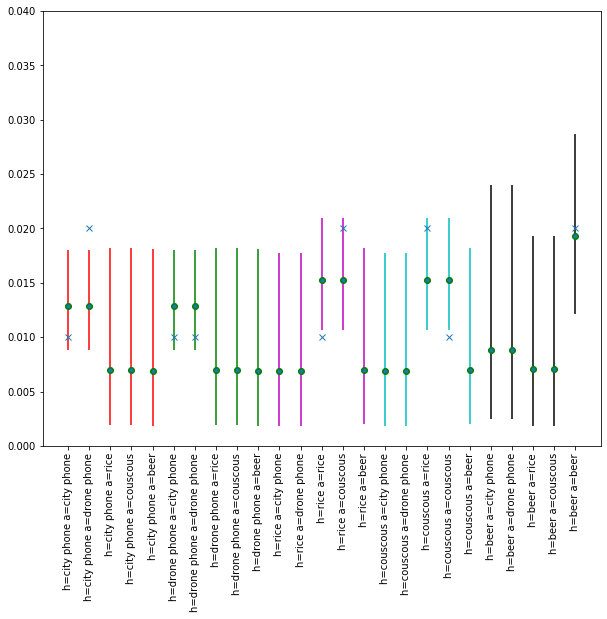

In [23]:
do_plot(s)
ylim([0,0.04])

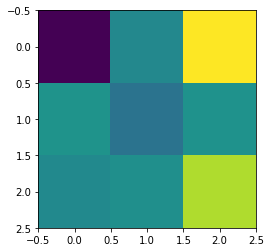

In [24]:
imshow(s['eps'].mean(0))

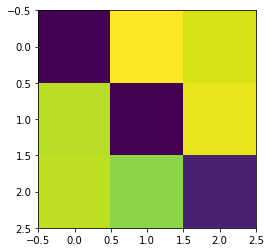

In [25]:
imshow(s['eps'].std(0))

(0, 0.04)

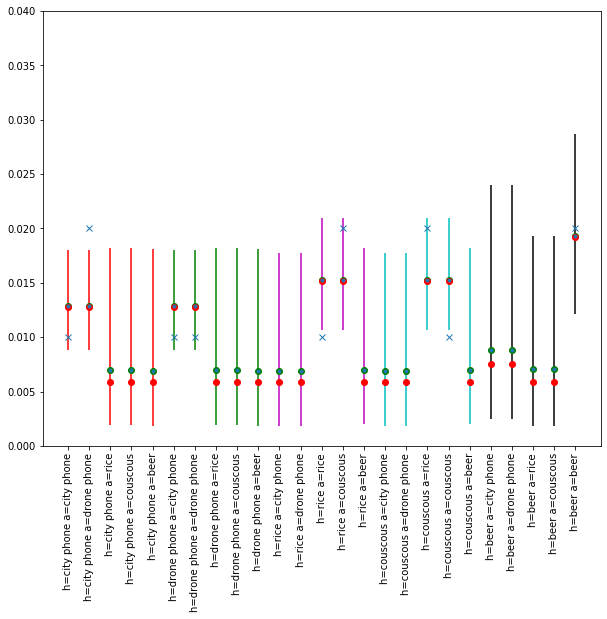

In [26]:
# maximum likelihood also works quite well..  

gg = model.optimizing(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
xnames = ['h=' + h+' a='+a for h,a in product(name_map.values(),name_map.values())]


do_plot(s)
plot(xnames,gg['ctr'].flatten(),'ro')

ylim([0,0.04])